# Setup

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.ensemble import RandomForestClassifier

# Utilities
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, recall_score, precision_score, f1_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
pd.set_option("display.max_columns", None)

# Load Data

In [3]:
directory = "/mnt/hd2/database/card-fraud-dataset/" 
name = "data.csv"

# Load dataset
dataset = pd.read_csv(os.path.join(directory, name))
print("Dataset:", dataset.shape)
dataset.head()

Dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [5]:
# Get statistical analysis on dataset
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data is very clean. No null or missing values to handle.

# Data Frequency

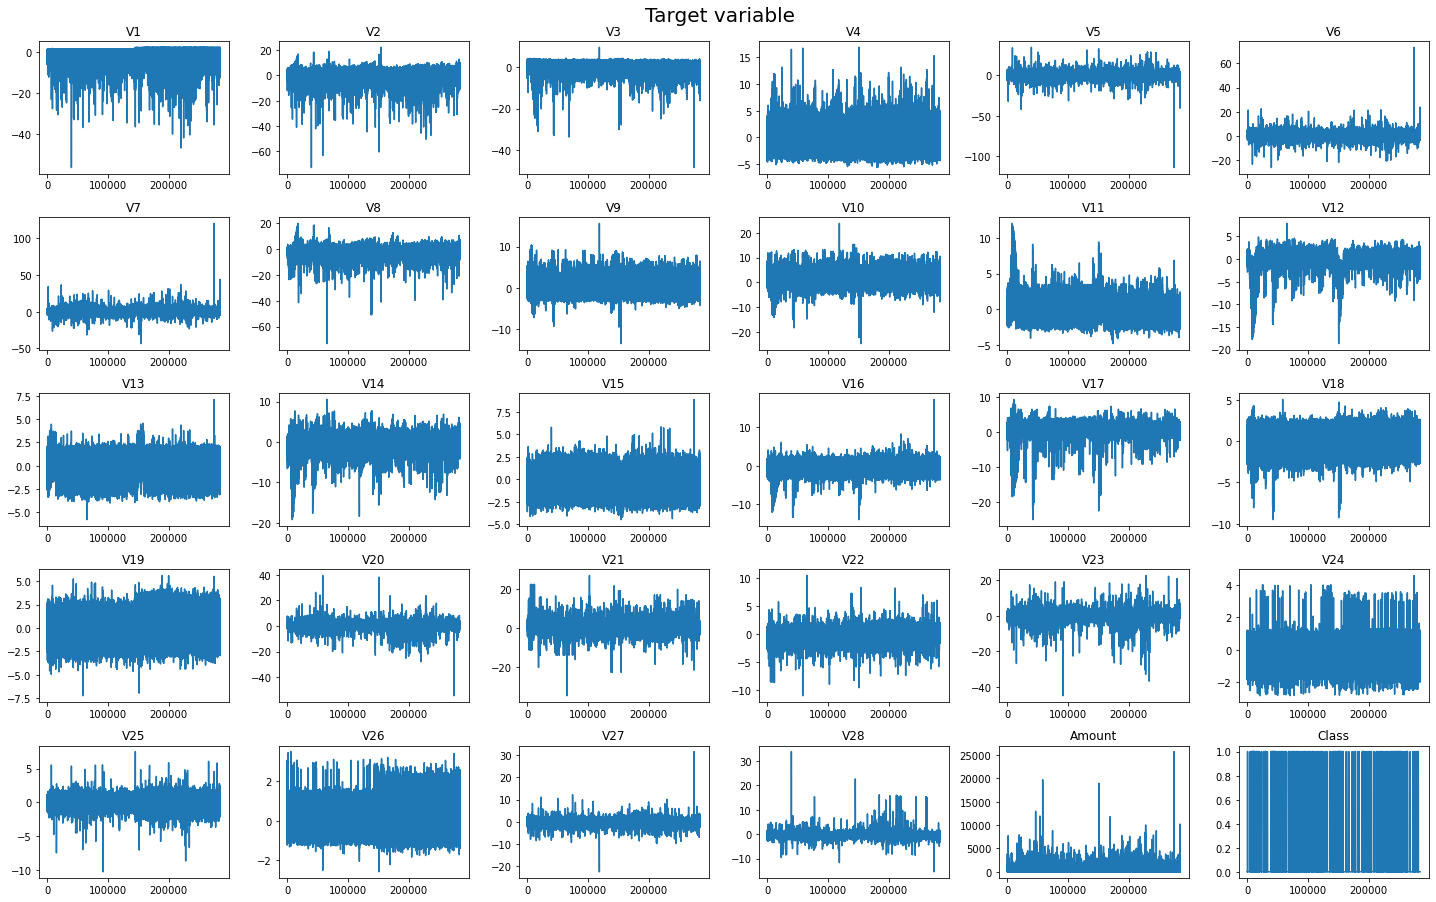

In [8]:
# Plot continuous feature
dataset2 = dataset.drop(columns=["Time"])

fig = plt.figure(figsize=(20, 15))

plt.suptitle("Target variable", fontsize=20)

# Plot a subplot for each feature column
for i in range(1, dataset2.shape[1] + 1):
    # Set subplot
    plt.subplot(6, 6, i)
    
    # Get current axes and set subplot metadata
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    # Plot
    x = range(dataset2.shape[0])
    y = dataset2.iloc[:, i - 1]
    plt.plot(x, y)

# Adjust padding
plt.tight_layout(rect=[0, 0, 1, 1])

# Feature Correlation

<AxesSubplot:title={'center':'Correlation with Dependent Variable'}>

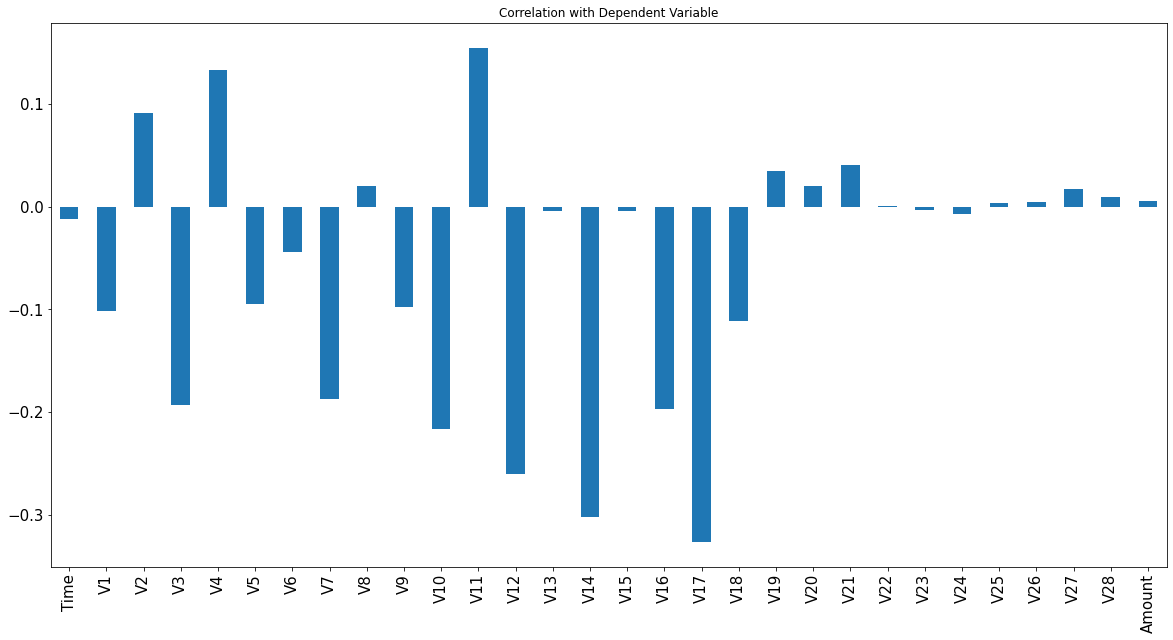

In [9]:
# Plot pair wise correlation with the dependent (target) variable
dataset3 = dataset.drop(columns=["Class"])

dataset3.corrwith(dataset.Class, axis=0).plot.bar(
    figsize=(20,10),
    title="Correlation with Dependent Variable",
    fontsize=15)

<AxesSubplot:>

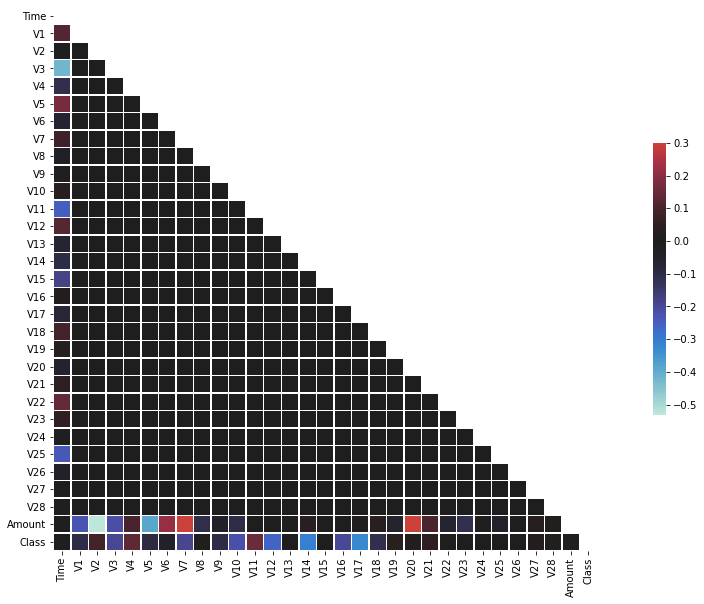

In [10]:
# Compute correlation matrix
dataset4 = dataset
corr = dataset4.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

# Get indices of the upper triangle
upper_triangle_indices = np.triu_indices_from(mask)

# Set mask to remove upper traingle (redundant piece of information)
mask[upper_triangle_indices] = True

# Plot the heatmap with mask
plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Handling Imbalanced Data

In [11]:
print("Target distribution:\n", dataset.Class.value_counts())

Target distribution:
 0    284315
1       492
Name: Class, dtype: int64


Target distribution is highly imbalanced. The positive class only accounts for 0.172% of the total population.

In [12]:
# Initiate over sampler
X_resample, y_resample = SMOTE().fit_resample(dataset.drop(columns=["Class"]), dataset.Class.values.ravel())

print("X_resample:", X_resample.shape)
print("y_resample:", y_resample.shape)

X_resample: (568630, 30)
y_resample: (568630,)


# Prepare Model Input

In [13]:
# Split dataset into the train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_resample,
    y_resample,
    test_size=0.2,
    random_state=2021)

print("Train dataset:", X_train.shape, y_train.shape)
print("Test dataset:", X_val.shape, y_val.shape)

Train dataset: (454904, 30) (454904,)
Test dataset: (113726, 30) (113726,)


In [14]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
76240,56468.0000,-2.164674,-1.204243,2.414905,0.289245,1.863096,0.416966,-0.142780,0.492510,-0.176593,-0.756799,0.680247,0.198666,-0.530605,0.119205,1.825652,-0.876797,0.477736,-1.946464,-2.588602,0.436517,0.190268,0.092645,0.474696,-0.719858,0.033649,-0.584591,-0.131321,-0.119137,118.850000
257120,158011.0000,2.101143,-0.131634,-2.094440,0.202532,0.736452,-0.501847,0.413759,-0.274836,0.493477,0.101396,-1.575364,-0.191761,-0.516014,0.471888,-0.242767,-0.366962,-0.264130,-0.600831,0.401751,-0.185176,-0.075620,-0.101840,0.021499,0.071493,0.251293,0.573087,-0.106701,-0.075100,24.940000
91087,63308.0000,0.720228,-0.502411,-0.124104,1.520297,-0.259645,-0.309505,0.536413,-0.137572,0.083818,-0.151259,-0.486872,0.186951,-0.519650,0.415987,0.318101,-0.616863,0.197066,-0.786107,-0.563818,0.276685,0.137096,0.011050,-0.329518,0.104041,0.662103,-0.256414,-0.023641,0.052493,250.000000
143036,85081.0000,1.054919,-0.113364,0.204360,1.252489,-0.115784,0.311693,-0.088294,0.231148,0.288295,0.069758,0.598733,0.268761,-1.735110,0.568517,-0.590692,-0.350491,-0.014635,-0.171748,0.041629,-0.176340,-0.062049,-0.158528,-0.136550,-0.328469,0.606422,-0.309497,0.016570,0.007142,54.420000
486959,152099.0258,-5.338093,4.072904,-7.682783,5.726694,-1.596209,-2.023736,-3.831969,0.567124,-1.512612,-3.194617,4.015286,-7.742171,-0.742019,-11.855523,1.060759,-4.168804,-6.168847,-1.645675,0.791314,-0.444705,0.924200,0.445044,0.412615,-0.142046,-0.173165,0.299566,-2.461088,0.751732,20.392313


In [15]:
X_val.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
23485,32781.000000,1.235794,0.098385,0.040587,0.343351,0.003870,-0.233489,0.027501,-0.027294,-0.160746,0.107991,0.673339,0.644802,0.109667,0.466576,0.313680,0.653255,-0.913186,0.260097,0.487683,-0.025353,-0.193487,-0.638758,-0.053066,-0.493917,0.384701,0.205273,-0.045505,0.000414,25.97000
119502,75473.000000,-1.867582,1.926002,0.027908,-0.369095,0.142066,-1.394386,0.368604,0.815223,-0.772279,-1.477593,1.277074,0.431517,-0.830203,-0.695447,-0.880344,1.520364,0.425187,1.118458,-1.999729,-0.443761,0.141848,0.099621,-0.090003,0.357129,0.284793,-0.701924,-0.160932,0.061140,1.00000
228410,145496.000000,1.985697,-1.249794,-0.783623,-1.270199,-0.401368,1.090395,-1.311425,0.498463,-0.126068,0.842598,1.000606,-0.465648,-1.025650,0.220280,1.050449,1.078440,0.341780,-1.827880,-0.114946,-0.110997,0.118030,0.221837,0.371648,-1.698155,-0.747757,-0.365668,0.038601,-0.063894,40.00000
425916,77321.363556,-2.261294,1.811027,-2.483048,2.682151,-0.056241,-0.872130,-1.470730,1.018997,-1.243305,-3.362915,0.869449,-2.116409,0.597692,-5.272287,0.584708,-1.383921,-0.262094,-0.143186,0.870424,0.044815,0.141031,-0.499208,-0.438231,-0.725763,-0.100978,-0.284368,-0.133155,0.188001,30.74259
498930,7833.055105,0.277545,2.374054,-4.517969,3.501790,-1.459104,-1.999744,-3.157967,1.028962,0.098377,-4.552447,3.783332,-7.467428,0.200023,-5.605904,1.302721,-2.744360,-2.083732,-0.610234,0.750381,0.246664,0.372728,-0.193334,0.533198,-0.150501,-1.480062,0.350540,0.431279,0.079639,1.00000


# Scaling Features

In [16]:
# Instantiate feature scaler
rb_scaler = RobustScaler()

# Fit feature scaler opn train data
X_train = rb_scaler.fit_transform(X_train)

# Scale test features
X_val = rb_scaler.transform(X_val)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)

Train: (454904, 30) (454904,)
Validation: (113726, 30) (113726,)


# Modelling

In [17]:
def plot_confusion_matrix(y_true, y_pred):
    # Compute confusion matrix
    matrix = confusion_matrix(y_true, y_pred)

    # Create matrix df
    matrix_df = pd.DataFrame(matrix, index=(0, 1), columns=(0, 1))

    # Visualize confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix_df, annot=True, fmt="g")

    # Add metadata
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label") 
    plt.show()

In [18]:
# Instantiate model with weighted class to handle class imbalance
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", class_weight="balanced", n_jobs=8, verbose=True, random_state=2021)

# Fit model to training dataset
rf_classifier.fit(X=X_train, y=y_train)

# Evaluate on validation test
rf_yhat = rf_classifier.predict(X_val)

# Compute performance metrics
print("Recall on Validation: {:.4f}%".format(recall_score(y_val, rf_yhat)*100))
print("Precision on validation: {:.4f}%".format(precision_score(y_val, rf_yhat)*100))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  6.7min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  8.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s


Recall on Validation: 100.0000%
Precision on validation: 99.9841%


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.5s finished


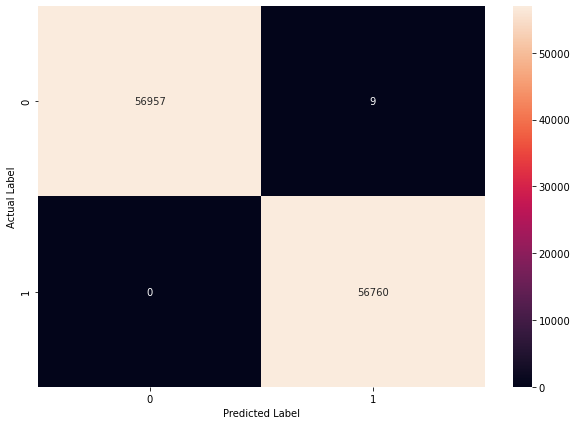

In [19]:
plot_confusion_matrix(y_val, rf_yhat)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.5s finished


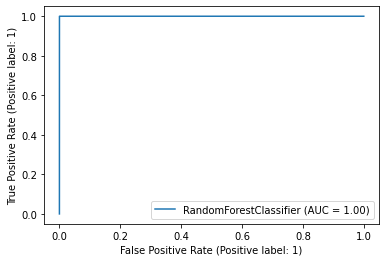

In [20]:
plot_roc_curve(rf_classifier, X_val, y_val)

# Understand Credit Fraud Factors

In [21]:
# Analyzing Coefficients
features_df = pd.concat([
    pd.DataFrame(dataset.columns.drop(["Time", "Class"]), columns=["Features"]),
    pd.DataFrame(np.transpose(rf_classifier.feature_importances_),columns = ["Coef"])],
    axis = 1)

features_df

,Features,Coef
0,V1,0.007432
1,V2,0.009388
2,V3,0.022771
3,V4,0.047594
4,V5,0.110847
5,V6,0.005485
6,V7,0.007313
7,V8,0.032294
8,V9,0.006731
9,V10,0.017822


In [22]:
# Select top k features
k = 5
topk_pos = features_df.sort_values("Coef", ascending=False)[:k]

print("Top {} features determining cred fraud: \n {}\n".format(k, topk_pos))

Top 5 features determining cred fraud: 
    Features      Coef
14      V15  0.201279
10      V11  0.147461
12      V13  0.113476
4        V5  0.110847
17      V18  0.092658

